# **CSCI 4402	FINAL YEAR PROJECT II**


> ## **Detection of Cone Cut Errors in Dental Bitewing Radiograph using CNN for Quality Assurance**

### Prepared by:
  **MOHAMED MOUBARAK MOHAMED MISBAHOU MKOUBOI (1820705)**\
  **Umayma Ahhmed (1810704)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Build our Image Classification Model!

## Import the required libraries 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import pandas as pd
from keras.models import Sequential

## Loading the data

In [ ]:
# Now we can easily fetch our train and validation data.

train = '/content/drive/MyDrive/dataset/train'
val = '/content/drive/MyDrive/dataset/test'
test = '/content/drive/MyDrive/dataset/val'

In [ ]:
# Print classes inside the dataset

print(os.listdir("/content/drive/MyDrive/dataset"))

['test', 'train', 'val', 'download.jpeg', 'download (1).jpeg']


## Data Augmentation

## Loading the Images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,    
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)


In [ ]:
batch_size = 16 
#The dimension of the images we are going to define is 500x500 
img_height = 500
img_width = 500

## Data Preprocessing and Data Augmentation

In [ ]:
train = image_gen.flow_from_directory(
      train,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      val,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 3530 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


## Visualize the data

In [ ]:
df.loc[len(df)] = list

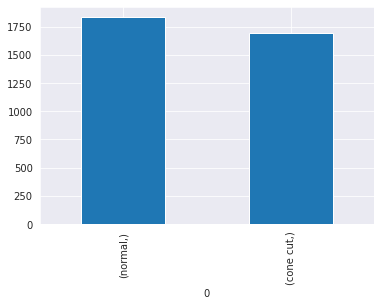

In [ ]:
# Displaying the data inside the dataframe in a plot bar

df.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'cone cut')

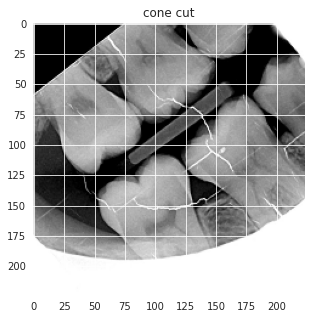

In [ ]:
# Visualize a random image from the cone cut classes

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [ ]:
# Label of the above image

labels[train[0][1]]

'cone cut'

In [ ]:
train[0][1]

0

Text(0.5, 1.0, 'normal')

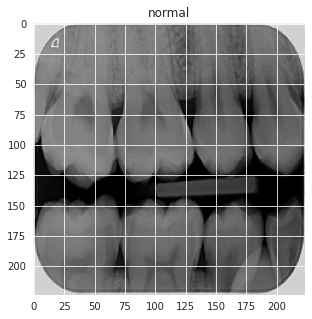

In [ ]:
# Visualize a random image from the normal classes

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
labels[train[-1][1]]

'normal'

In [ ]:
train[-1][1]

1

## Define the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"),)
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [ ]:
# Using Adam as our optimizer and SparseCategoricalCrossentropy as the loss function

opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [ ]:
# Assigning Class Weights

from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.0412979351032448, 1: 0.9618528610354223}


In [ ]:
# Training our model for 100 epochs 

history = model.fit(train, epochs = 100, validation_data = valid, class_weight=cw)

Epoch 1/100
221/221 [==============================] - 580s 3s/step - loss: 0.6680 - accuracy: 0.5790 - val_loss: 0.6188 - val_accuracy: 0.8439
Epoch 2/100
221/221 [==============================] - 251s 1s/step - loss: 0.5993 - accuracy: 0.7487 - val_loss: 0.5352 - val_accuracy: 0.8874
Epoch 3/100
221/221 [==============================] - 252s 1s/step - loss: 0.5411 - accuracy: 0.8017 - val_loss: 0.4717 - val_accuracy: 0.9012
Epoch 4/100
221/221 [==============================] - 250s 1s/step - loss: 0.4992 - accuracy: 0.8102 - val_loss: 0.4213 - val_accuracy: 0.8854
Epoch 5/100
221/221 [==============================] - 250s 1s/step - loss: 0.4617 - accuracy: 0.8238 - val_loss: 0.3856 - val_accuracy: 0.8854
Epoch 6/100
221/221 [==============================] - 252s 1s/step - loss: 0.4324 - accuracy: 0.8394 - val_loss: 0.3598 - val_accuracy: 0.8933
Epoch 7/100
221/221 [==============================] - 251s 1s/step - loss: 0.4204 - accuracy: 0.8317 - val_loss: 0.3339 - val_accuracy:

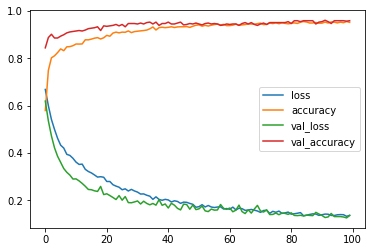

In [ ]:
pd.DataFrame(model.history.history).plot()

## Evaluating the result

In [ ]:
# Accuracy on test data

test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

63/63 [==============================] - 250s 4s/step - loss: 0.1405 - accuracy: 0.9464
The testing accuracy is : 94.64285969734192 %


In [ ]:
# Predict the test data

preds = (model.predict(test)[:, 1] > 0.5).astype("int32")

63/63 [==============================] - 16s 251ms/step


In [ ]:
preds = np.argmax(model.predict(test),axis=1)

63/63 [==============================] - 16s 252ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

## Confusion Matrix

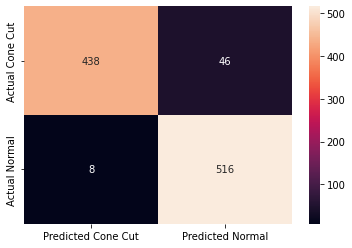

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Cone Cut", "Actual Normal"],
columns=["Predicted Cone Cut", "Predicted Normal"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
# Classification Report

print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['CONE CUT','NORMAL']))

              precision    recall  f1-score   support

    CONE CUT       0.98      0.90      0.94       484
      NORMAL       0.92      0.98      0.95       524

    accuracy                           0.95      1008
   macro avg       0.95      0.94      0.95      1008
weighted avg       0.95      0.95      0.95      1008



## Let’s visualize some of the predicted images with percentage %

(1008, 500, 500, 1)
(1008,)


IndexError: ignored

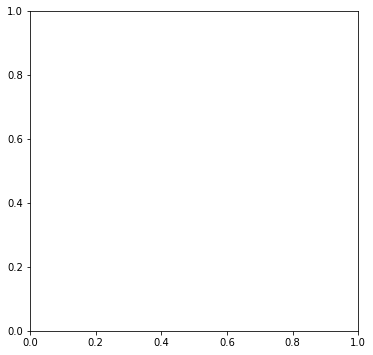

In [ ]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)
#this little code above extracts the images from test Data iterator without shuffling the sequence
# x contains image array and y has labels 
dic = {0:'CONE CUT', 1:'NORMAL'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Normal case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Cone Cut case'.format(1-preds[i][0]))
plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
plt.imshow(np.squeeze(x[i]))
plt.axis('off')
plt.show()

In [ ]:
print(x.shape)
print(y.shape)

(1008, 500, 500, 1)
(1008,)


### Let’s do some field testing on our model with my X-ray

1/1 [==============================] - 0s 51ms/step


ValueError: ignored

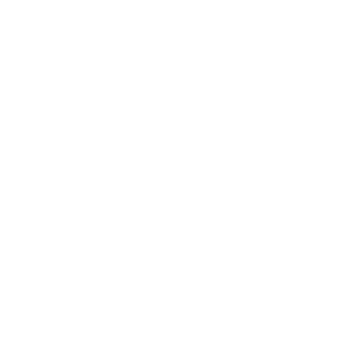

In [ ]:
# Testing with my own Chest X-Ray
hardik_path = '/content/drive/MyDrive/dataset/download (1).jpeg'
from tensorflow.keras.preprocessing import image
hardik_img = image.load_img(hardik_path, target_size=(500, 500),color_mode='grayscale')
# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)
#predict
hardik_preds= model.predict(pp_hardik_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if hardik_preds < 0.5: 
    out = ('I am {:.2%} percent confirmed that this is a Normal case'.format(hardik_preds[0][0]))
    
else: 
    out = ('I am {:.2%} percent confirmed that this is a Cone Cut case'.format(1-hardik_preds[0][0]))
plt.title("Dental X-Ray\n"+out)  
plt.imshow(np.squeeze(pp_hardik_img))

1/1 [==============================] - 0s 53ms/step


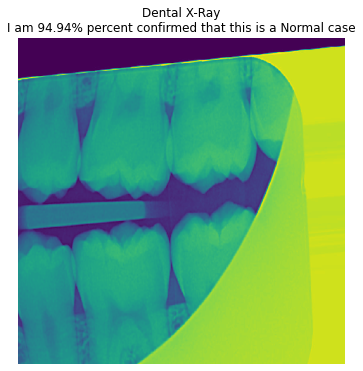

In [ ]:
# Testing with my own Chest X-Ray
hardik_path = '/content/drive/MyDrive/dataset/test/cone cut/cone cut 101.jpg'
from tensorflow.keras.preprocessing import image
hardik_img = image.load_img(hardik_path, target_size=(500, 500),color_mode='grayscale')
# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)
#predict
hardik_preds= model.predict(pp_hardik_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if hardik_preds.all()>= 0.5: 
    out = ('I am {:.2%} percent confirmed that this is a Normal case'.format(hardik_preds[0][0]))
    
else: 
    out = ('I am {:.2%} percent confirmed that this is a Cone Cut case'.format(1-hardik_preds[0][0]))
plt.title("Dental X-Ray\n"+out)  
plt.imshow(np.squeeze(pp_hardik_img))
plt.show()

# Save and load models

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

In [ ]:
import tensorflow as tf

new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

In [ ]:
model.save('my_model.h5') 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

https://medium.com/nerd-for-tech/easily-split-your-directory-into-train-validation-and-testing-format-f1359f34dd93\
https://www.youtube.com/watch?v=4HU5DiGD4lY\
https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/
https://www.projectpro.io/recipes/save-trained-model-in-python